In [308]:
from __future__ import division


import pandas as pd
import numpy as np
import seaborn as sns
import imblearn as imblearn
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr,  chi2_contingency
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score, RocCurveDisplay, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
c=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266)

In [309]:
pd.set_option('display.max_columns', None)

In [310]:
data=pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [312]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [313]:
nans = data.isna().sum().sort_values(ascending=False)
pct = nans * 100 / data.shape[0]
uniques = data.nunique()
noted = pd.concat([nans, pct, uniques, data.dtypes], axis=1)
noted.columns = ['Null count', 'Null percentage', 'n_unique values', 'data_type']
noted

,Null count,Null percentage,n_unique values,data_type
Sunshine,69835,48.009762,145,float64
Evaporation,62790,43.166506,358,float64
Cloud3pm,59358,40.807095,10,float64
Cloud9am,55888,38.421559,10,float64
Pressure9am,15065,10.356799,546,float64
Pressure3pm,15028,10.331363,549,float64
WindDir9am,10566,7.263853,16,object
WindGustDir,10326,7.098859,16,object
WindGustSpeed,10263,7.055548,67,float64
Humidity3pm,4507,3.098446,101,float64


In [314]:
print('number of rows in datasey', data.shape[0])
print('number of cols in datasey', data.shape[1])

number of rows in datasey 145460
number of cols in datasey 23


Analisis korelasi variable numerik

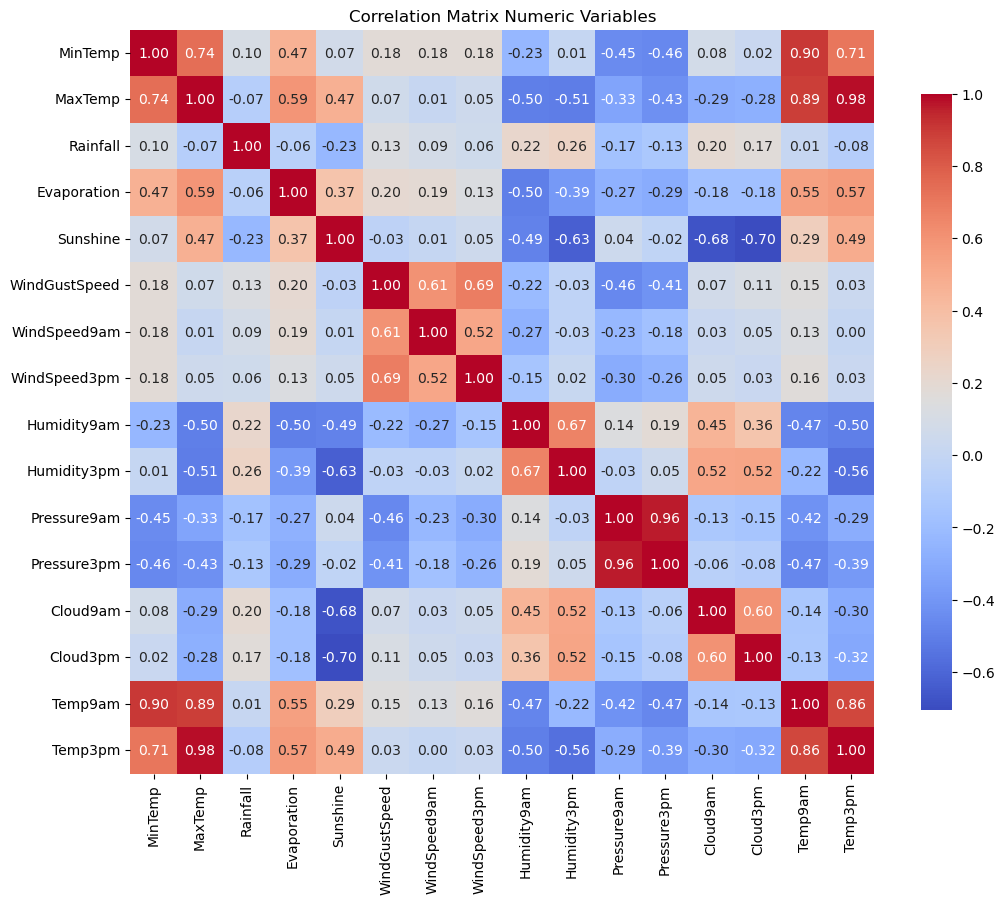

In [315]:
numerical_data = data.select_dtypes(include=[np.number])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Numeric Variables')
plt.show()

Analisis hubungan antara variabel numerik dan target:

In [316]:
data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

numerical_data = data.select_dtypes(include=[np.number])
numerical_data = numerical_data.fillna(numerical_data.median())

correlations = {}
for col in numerical_data.columns:
    if col != 'RainTomorrow':
        correlation, _ = pointbiserialr(numerical_data[col], numerical_data['RainTomorrow'])
        correlations[col] = correlation

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Point Biserial Correlation'])
correlation_df = correlation_df.sort_values(by='Point Biserial Correlation', ascending=False)
print(correlation_df)


         Variable  Point Biserial Correlation
9     Humidity3pm                    0.433167
13       Cloud3pm                    0.290610
8     Humidity9am                    0.251415
12       Cloud9am                    0.244242
2        Rainfall                    0.233877
5   WindGustSpeed                    0.220144
6    WindSpeed9am                    0.086746
7    WindSpeed3pm                    0.084214
0         MinTemp                    0.082249
14        Temp9am                   -0.025488
3     Evaporation                   -0.088709
1         MaxTemp                   -0.156523
15        Temp3pm                   -0.187721
11    Pressure3pm                   -0.211952
10    Pressure9am                   -0.230950
4        Sunshine                   -0.319412


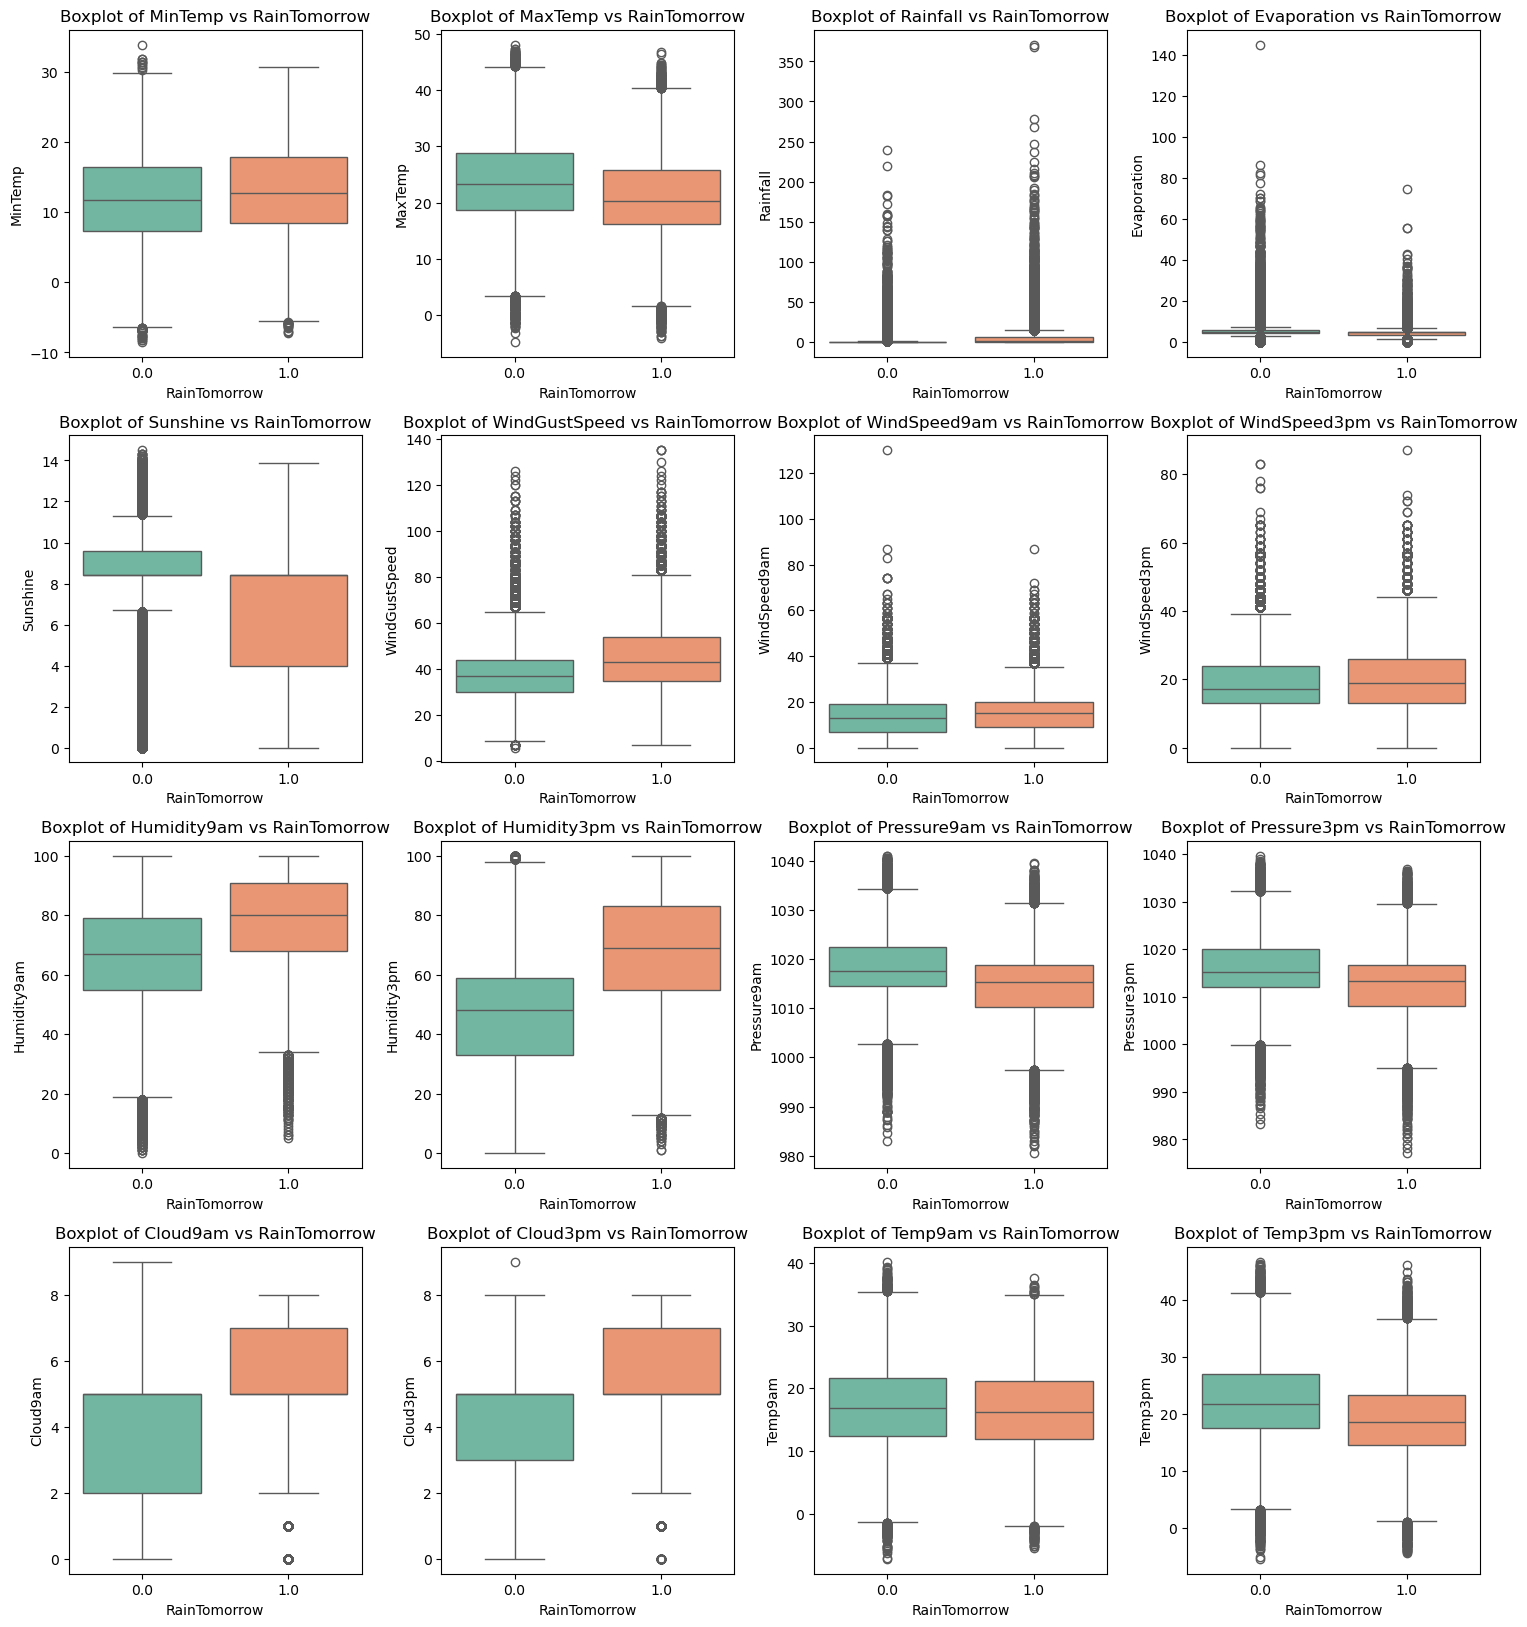

In [317]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_data.columns):
    if col != 'RainTomorrow':
        plt.subplot(5, 4, i + 1)
        sns.boxplot(x=data['RainTomorrow'], y=numerical_data[col], palette='Set2')
        plt.title(f'Boxplot of {col} vs RainTomorrow')
plt.tight_layout()
plt.show()

Analisis Distribusi variable Kategorikal

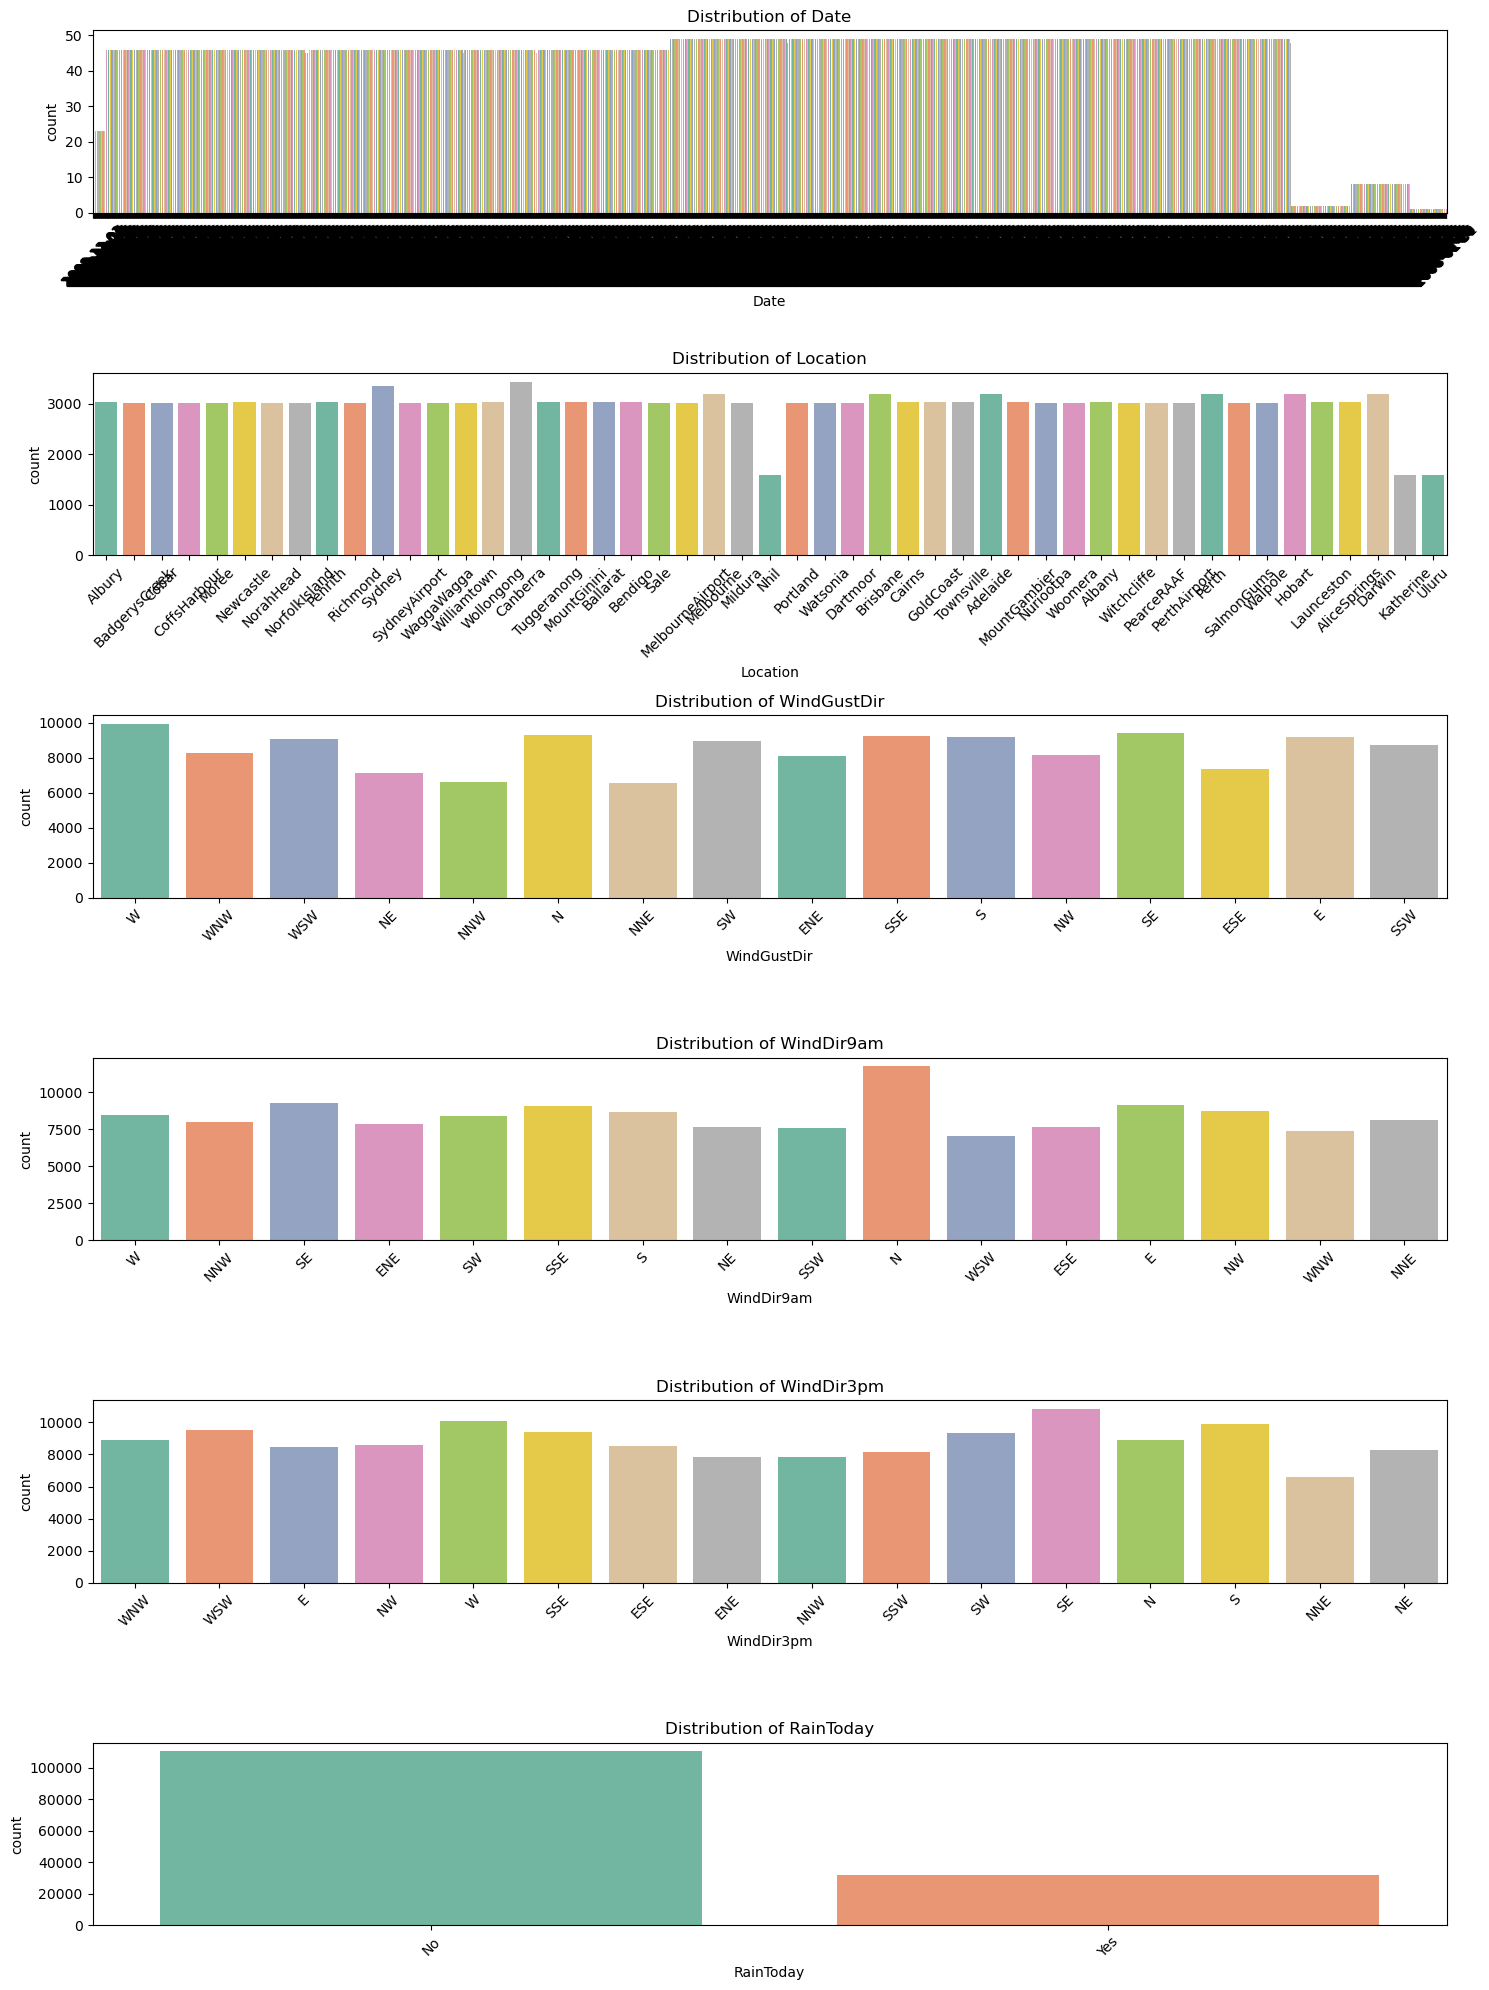

In [318]:
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analisis hubungan antara variabel kategorikal dan target

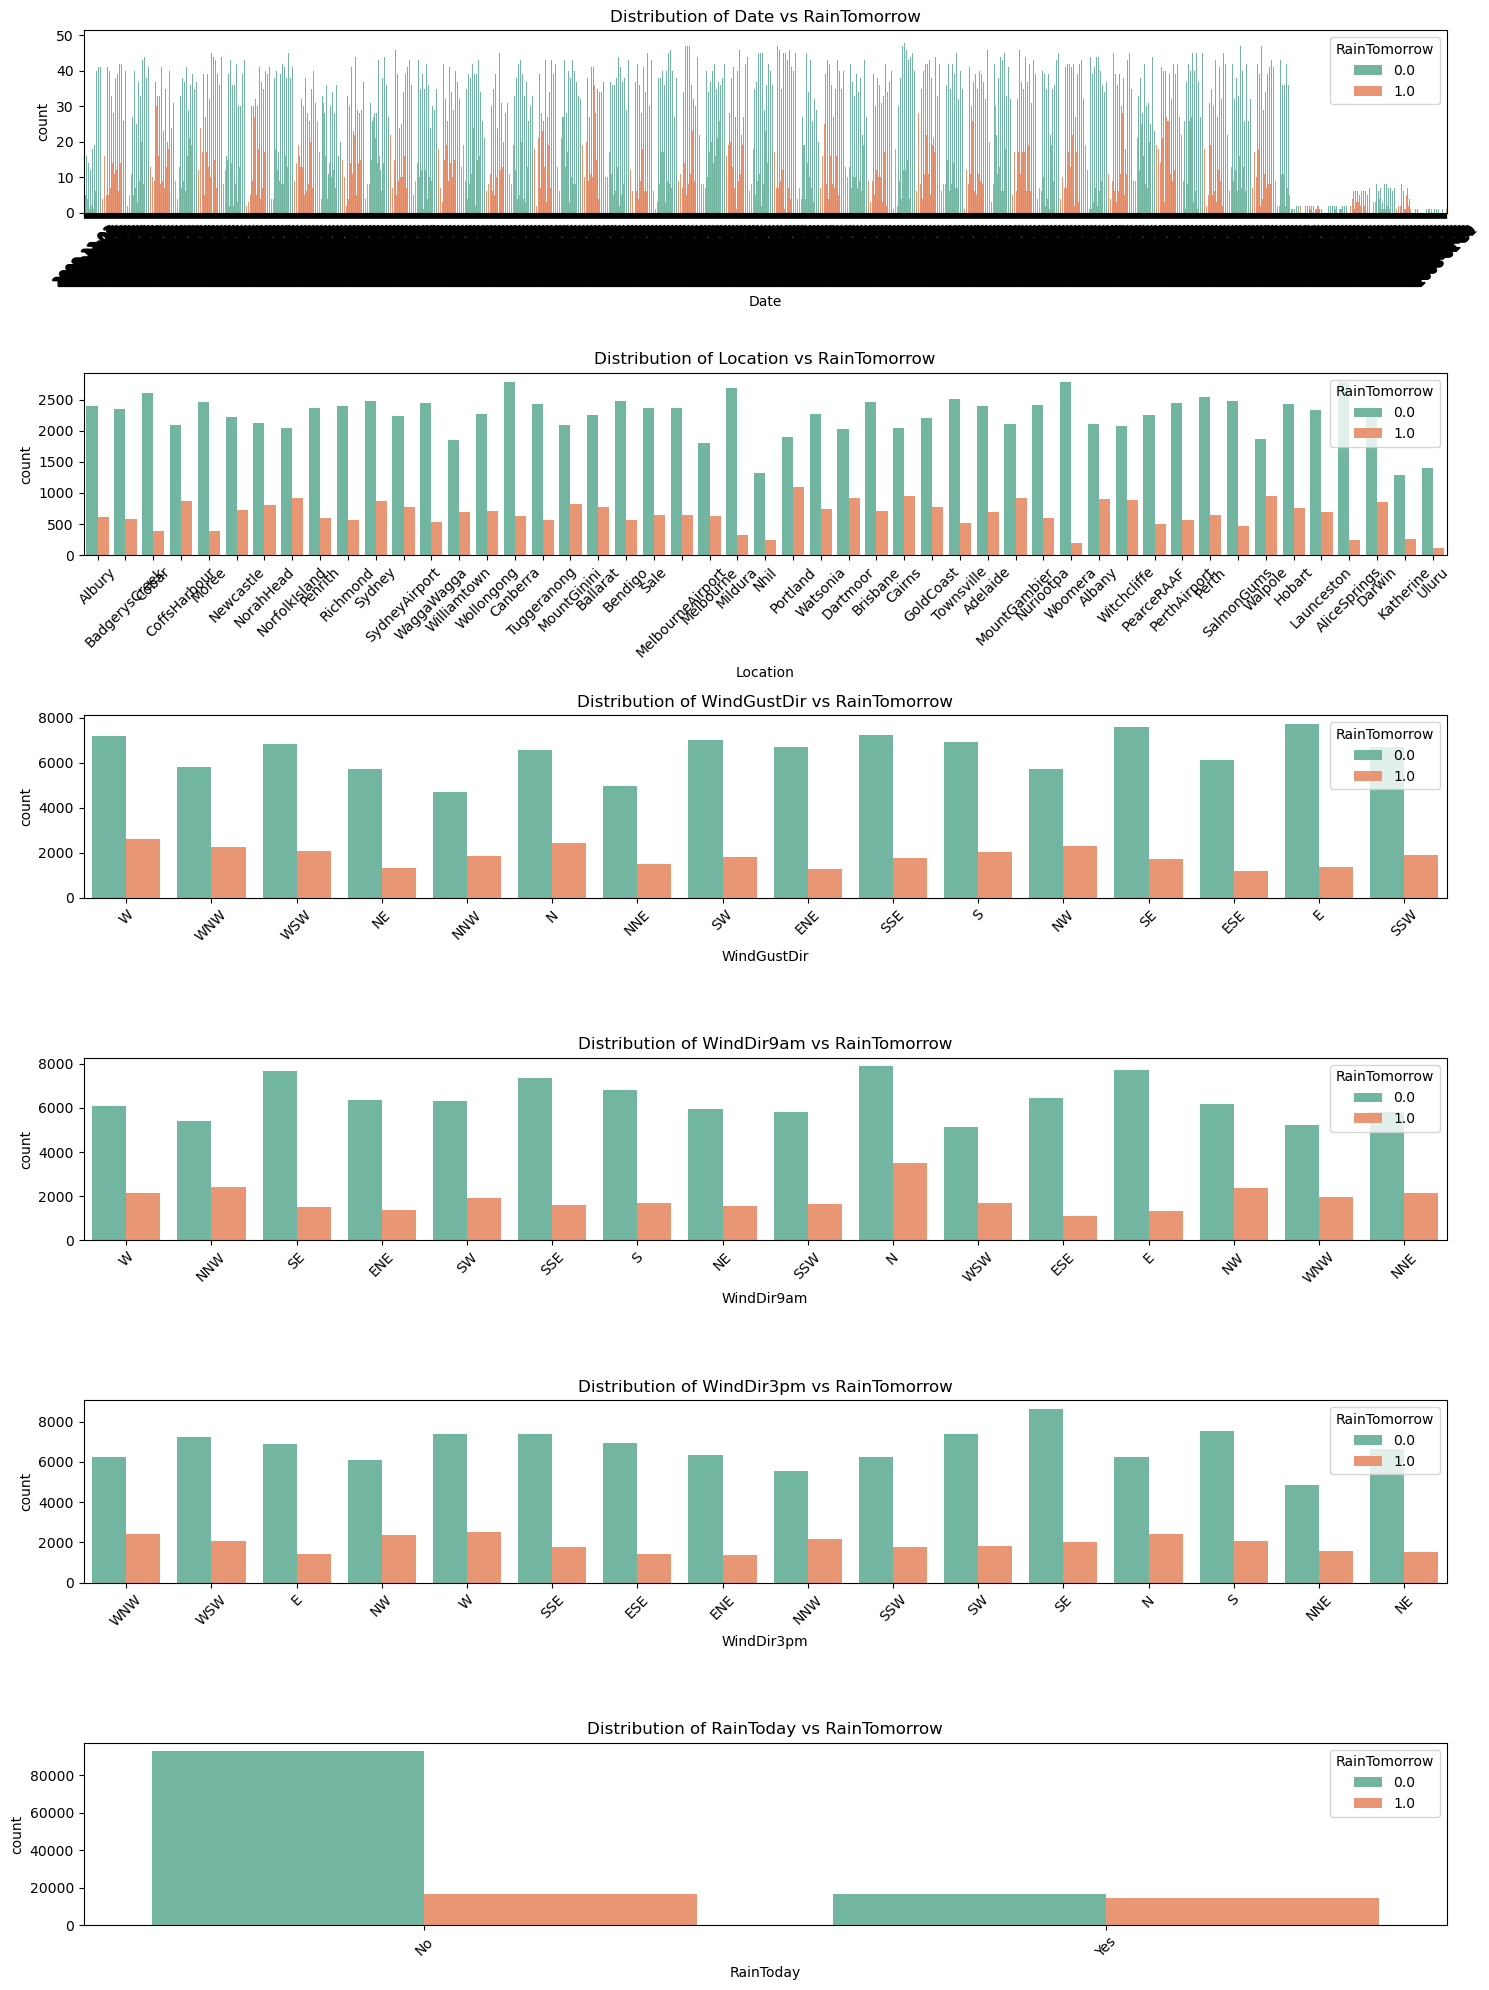

In [319]:
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(x=data[col], hue=data['RainTomorrow'], palette='Set2')
    plt.title(f'Distribution of {col} vs RainTomorrow')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [320]:
def chi_square_test(data, target, categorical_columns):
    results = {}
    for col in categorical_columns:
        contingency_table = pd.crosstab(data[col], data[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[col] = {'chi2': chi2, 'p-value': p}
    
    return pd.DataFrame(results).T.sort_values(by='p-value')

chi_square_results = chi_square_test(data, 'RainTomorrow', categorical_columns)
print(chi_square_results)


                     chi2        p-value
Date         16786.372890   0.000000e+00
Location      3544.790181   0.000000e+00
WindGustDir   1519.901242   0.000000e+00
WindDir9am    2214.846882   0.000000e+00
RainToday    13799.479649   0.000000e+00
WindDir3pm    1281.266704  5.645749e-264


Menanganani nilai yang hilang dan outlier

In [321]:
data.duplicated().sum()

0

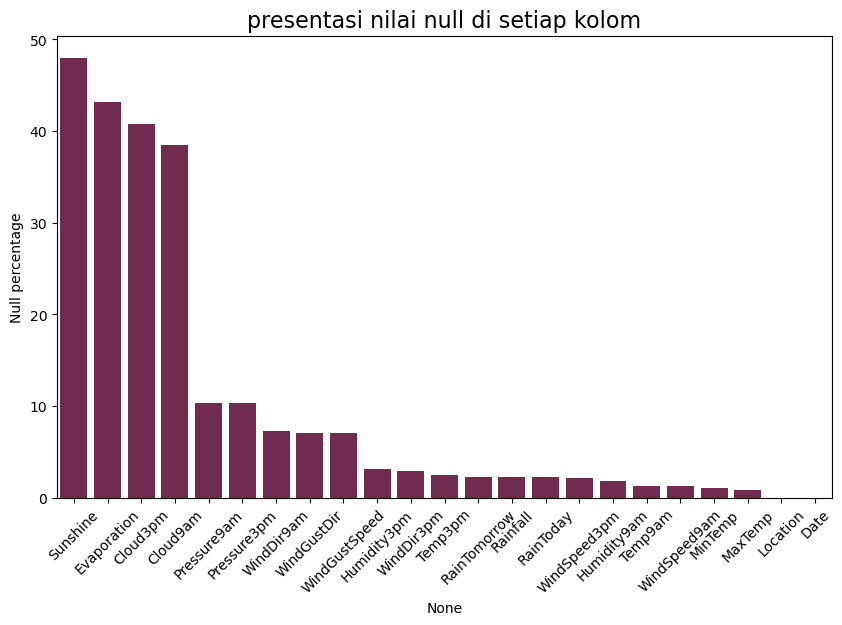

In [322]:
plt.figure(figsize=(10,6))
sns.barplot(x=noted.index,y=noted['Null percentage'],color=c)
plt.xticks(rotation=45)
plt.title('presentasi nilai null di setiap kolom', fontsize=16)
plt.show()

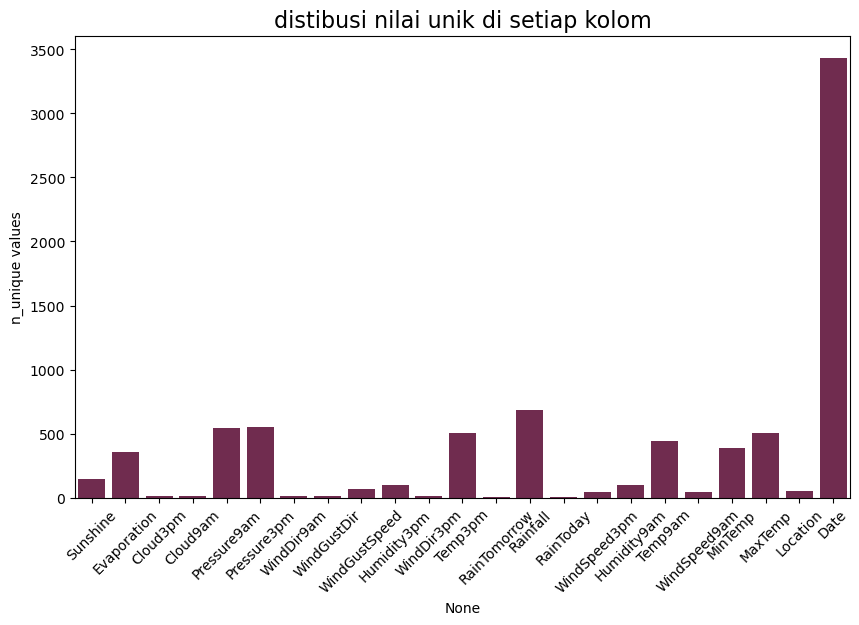

In [323]:
plt.figure(figsize=(10,6))
sns.barplot(x=noted.index,y=noted['n_unique values'],color=c)
plt.xticks(rotation=45)
plt.title('distibusi nilai unik di setiap kolom', fontsize=16)
plt.show()

In [324]:
def impute_missing(data):
    loc_unique = data['Location'].unique()
    num_col = data.select_dtypes(exclude='object').columns
    cat_col = data.select_dtypes(include='object').columns

    for col in num_col:
        for loc in loc_unique:
            filt = data['Location'].isin([loc])
            med = data[filt][col].median()
            data.loc[filt, col] = data[filt][col].fillna(med)
    
    for col in cat_col:
        for loc in loc_unique:
            filt = data['Location'].isin([loc])
            if data[filt][col].empty:
                continue  # Skip to next location if empty
            mode = data[filt][col].mode()
            if not mode.empty:
                med = mode[0]
                data.loc[filt, col] = data[filt][col].fillna(med)
    
    return data


In [325]:
data=impute_missing(data)

In [326]:
remaining_nulls=data.isnull().sum().sort_values(ascending=False)

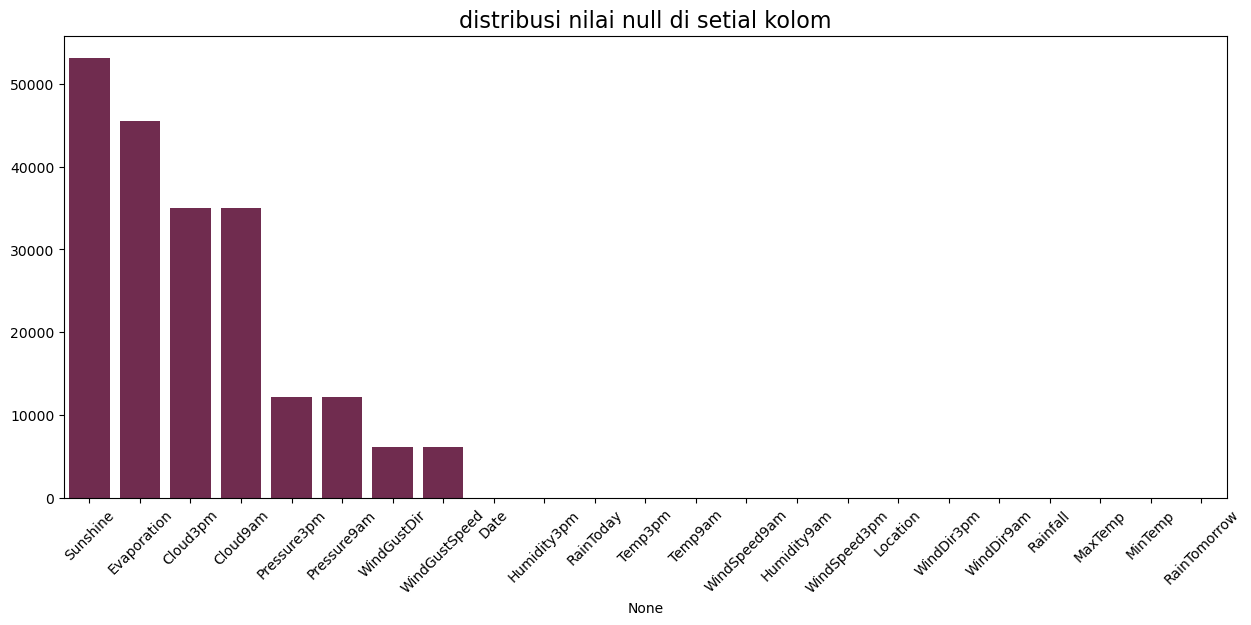

In [327]:
plt.figure(figsize=(15,6))
sns.barplot(x=remaining_nulls.index,y=remaining_nulls.values,color=c)
plt.xticks(rotation=45)
plt.title('distribusi nilai null di setial kolom', fontsize=16)
plt.show()

In [328]:
data.dropna(subset=['WindGustDir' , 'WindGustSpeed' , 'WindDir9am', 'WindDir3pm' , 'Pressure9am' , 'Pressure3pm' , 'RainToday' ,  'RainTomorrow', 'Evaporation','Sunshine', 'Cloud9am' , 'Cloud3pm'], inplace=True  , axis= 0)

In [329]:
data['Date'] = pd.to_datetime(data['Date'] )

In [330]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

In [331]:
data.drop('Date',axis=1,inplace=True)

In [332]:
num_col = data.select_dtypes(exclude='object').columns
cat_col = data.select_dtypes(include='object').columns

In [333]:
len(num_col)

20

[]

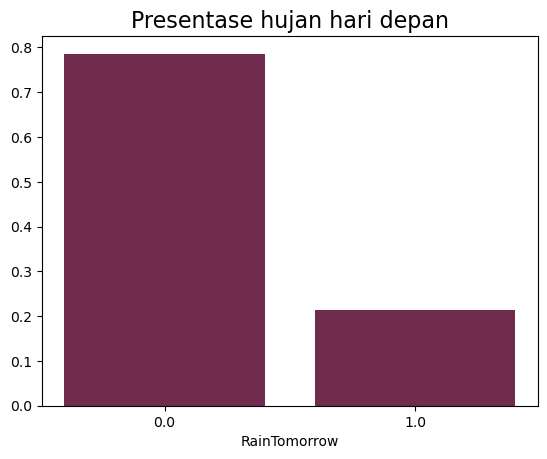

In [334]:
co=data['RainTomorrow'].value_counts()/data['RainTomorrow'].count()
sns.barplot(x=co.index,y=co.values,color=c)
plt.title('Presentase hujan hari depan', fontsize=16)
plt.plot()

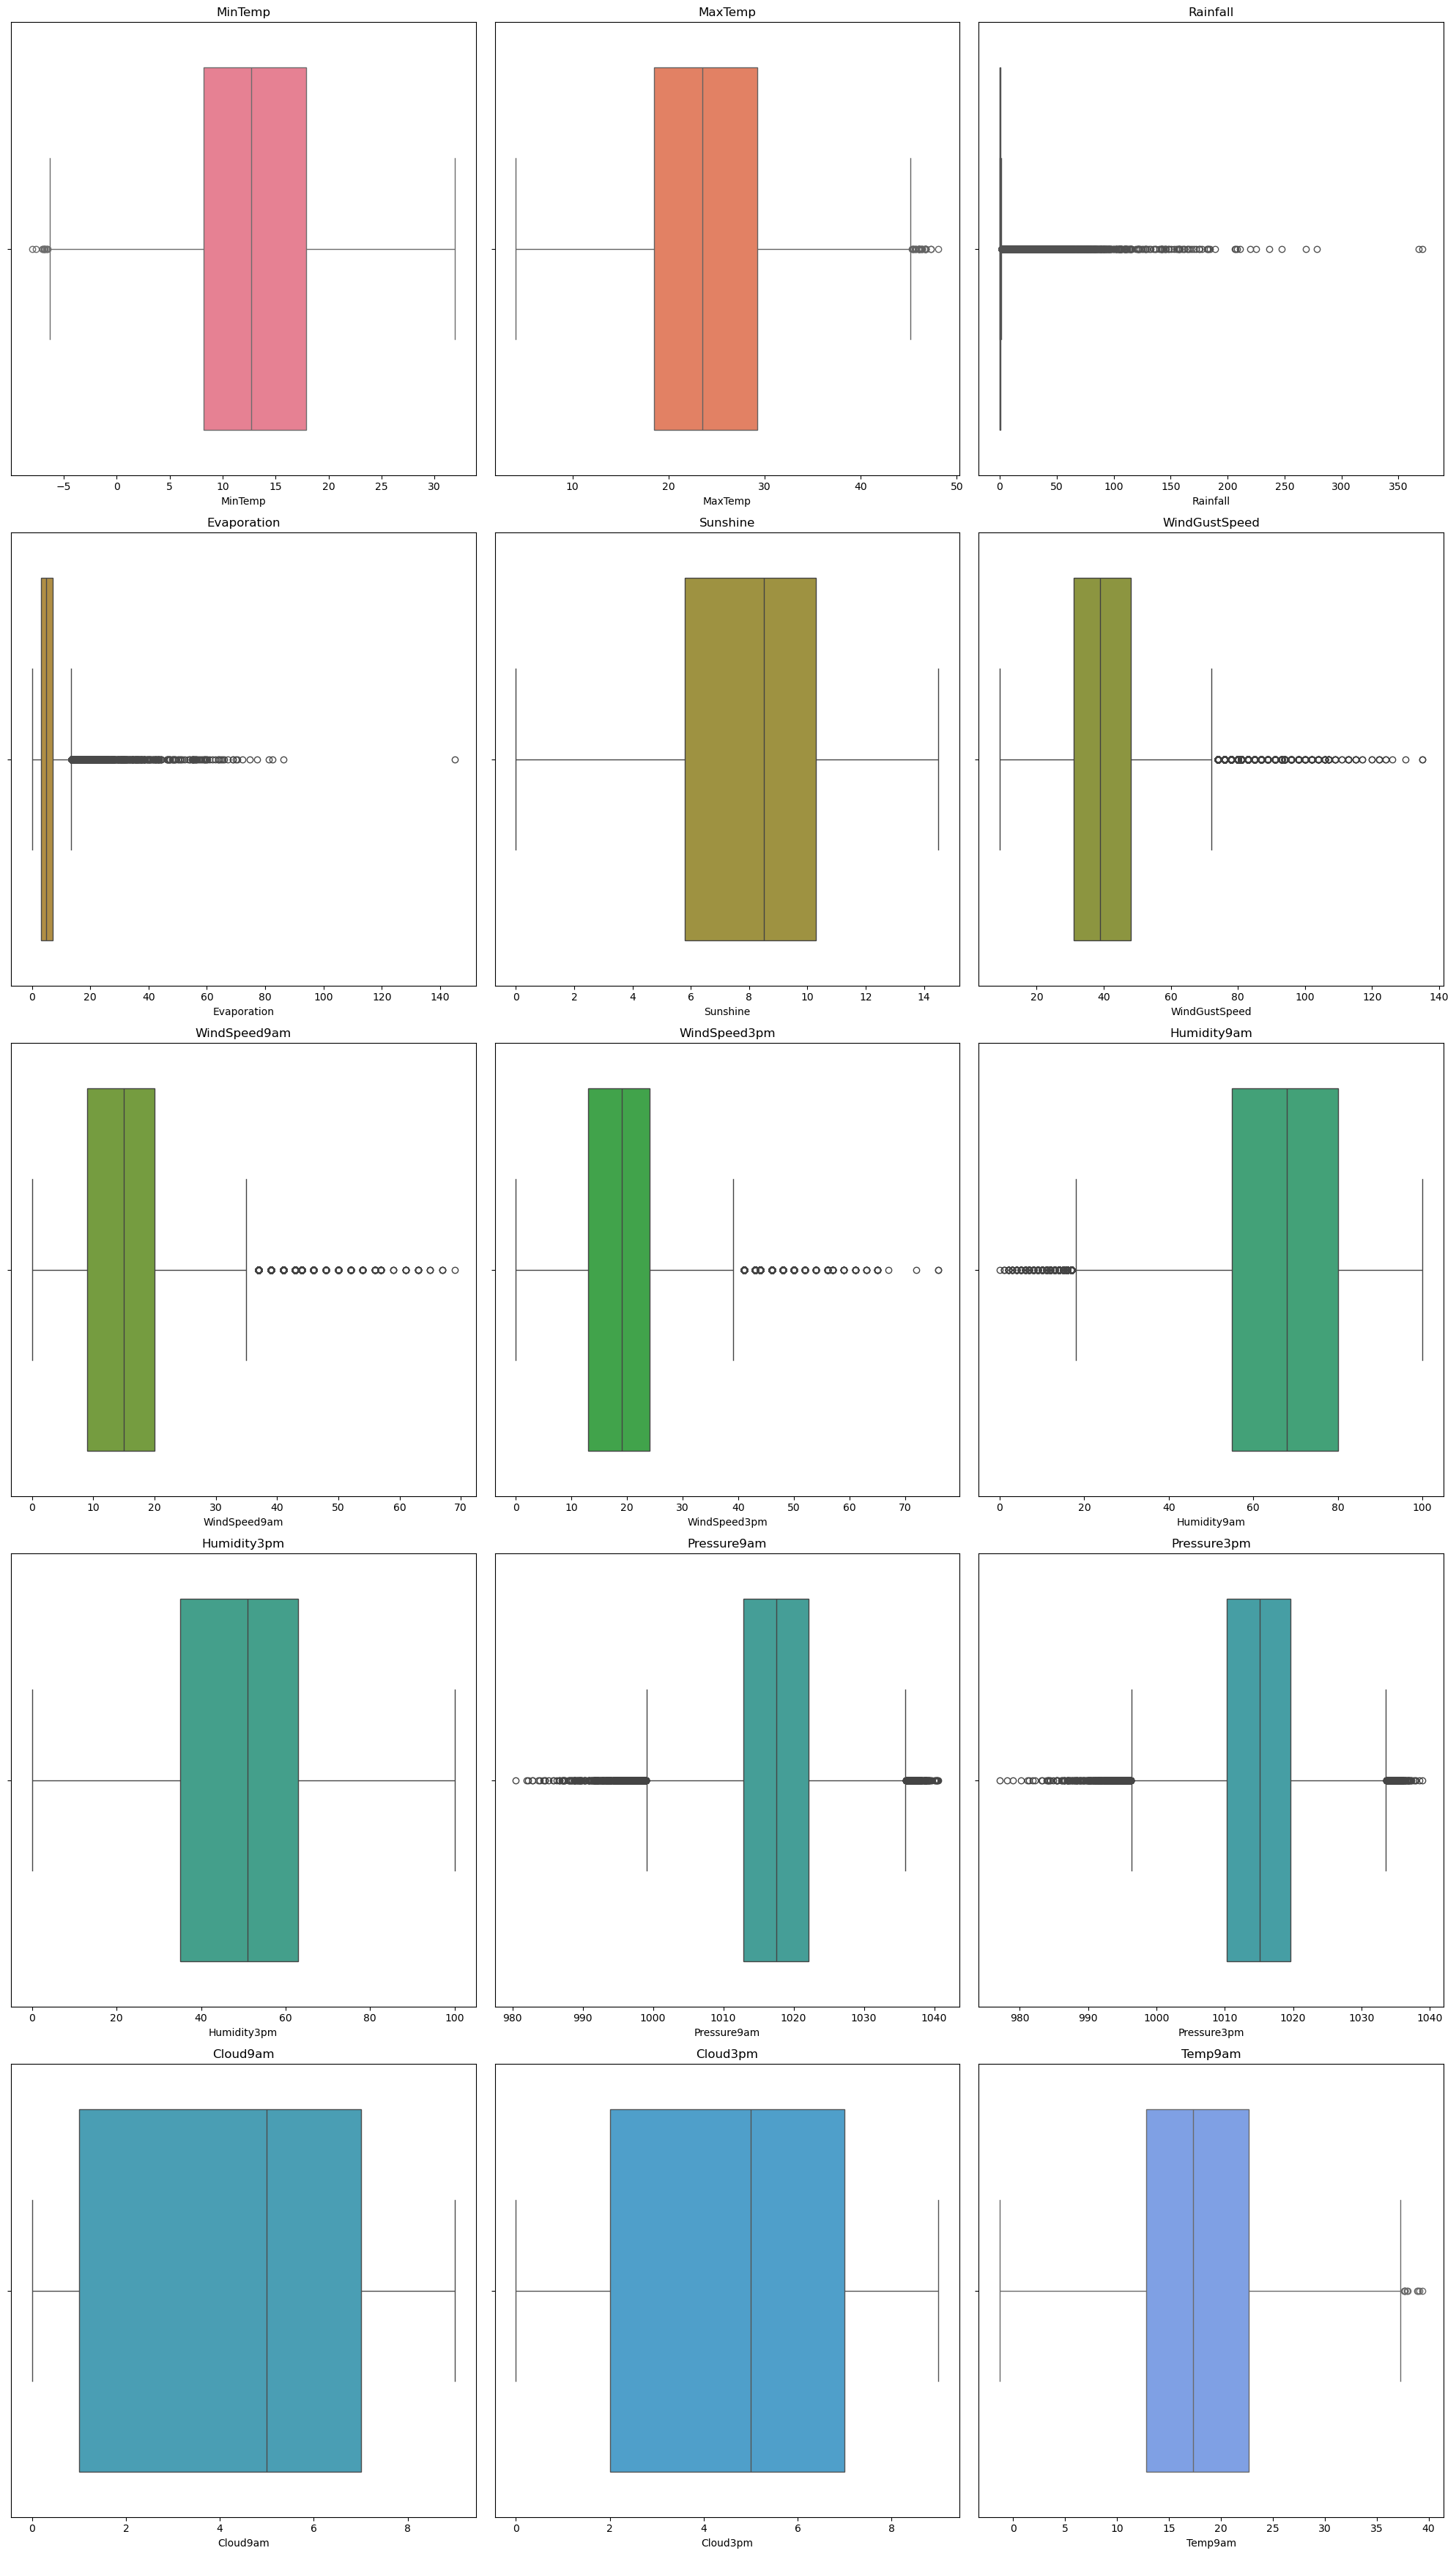

In [335]:
colors = sns.color_palette('husl', len(num_col))
fig, ax = plt.subplots(5, 3, figsize=(20, 35))
idx = 0
for i in range(5):
    for j in range(3):
        if idx < len(num_col):
            sns.boxplot(ax=ax[i, j], x=data[num_col[idx]], color=colors[idx])
            ax[i, j].set_title(num_col[idx])
            idx = idx + 1
plt.tight_layout()
plt.show()

Menangani outliers

In [336]:
def handle_outliers(data,impute_strategy='median'):
    num_col = data.select_dtypes(exclude='object').columns
    for col in num_col:
        z_scores = np.abs(stats.zscore(data[col]))
        outliers = np.where(z_scores > 2)[0]  

        if len(outliers) == 0:
            continue 
            
        if impute_strategy == 'median':
            imputed_value = data[col].median()
        elif impute_strategy == 'mean':
            imputed_value = data[col].mean()
            
        data.loc[outliers, col] = imputed_value

    return data

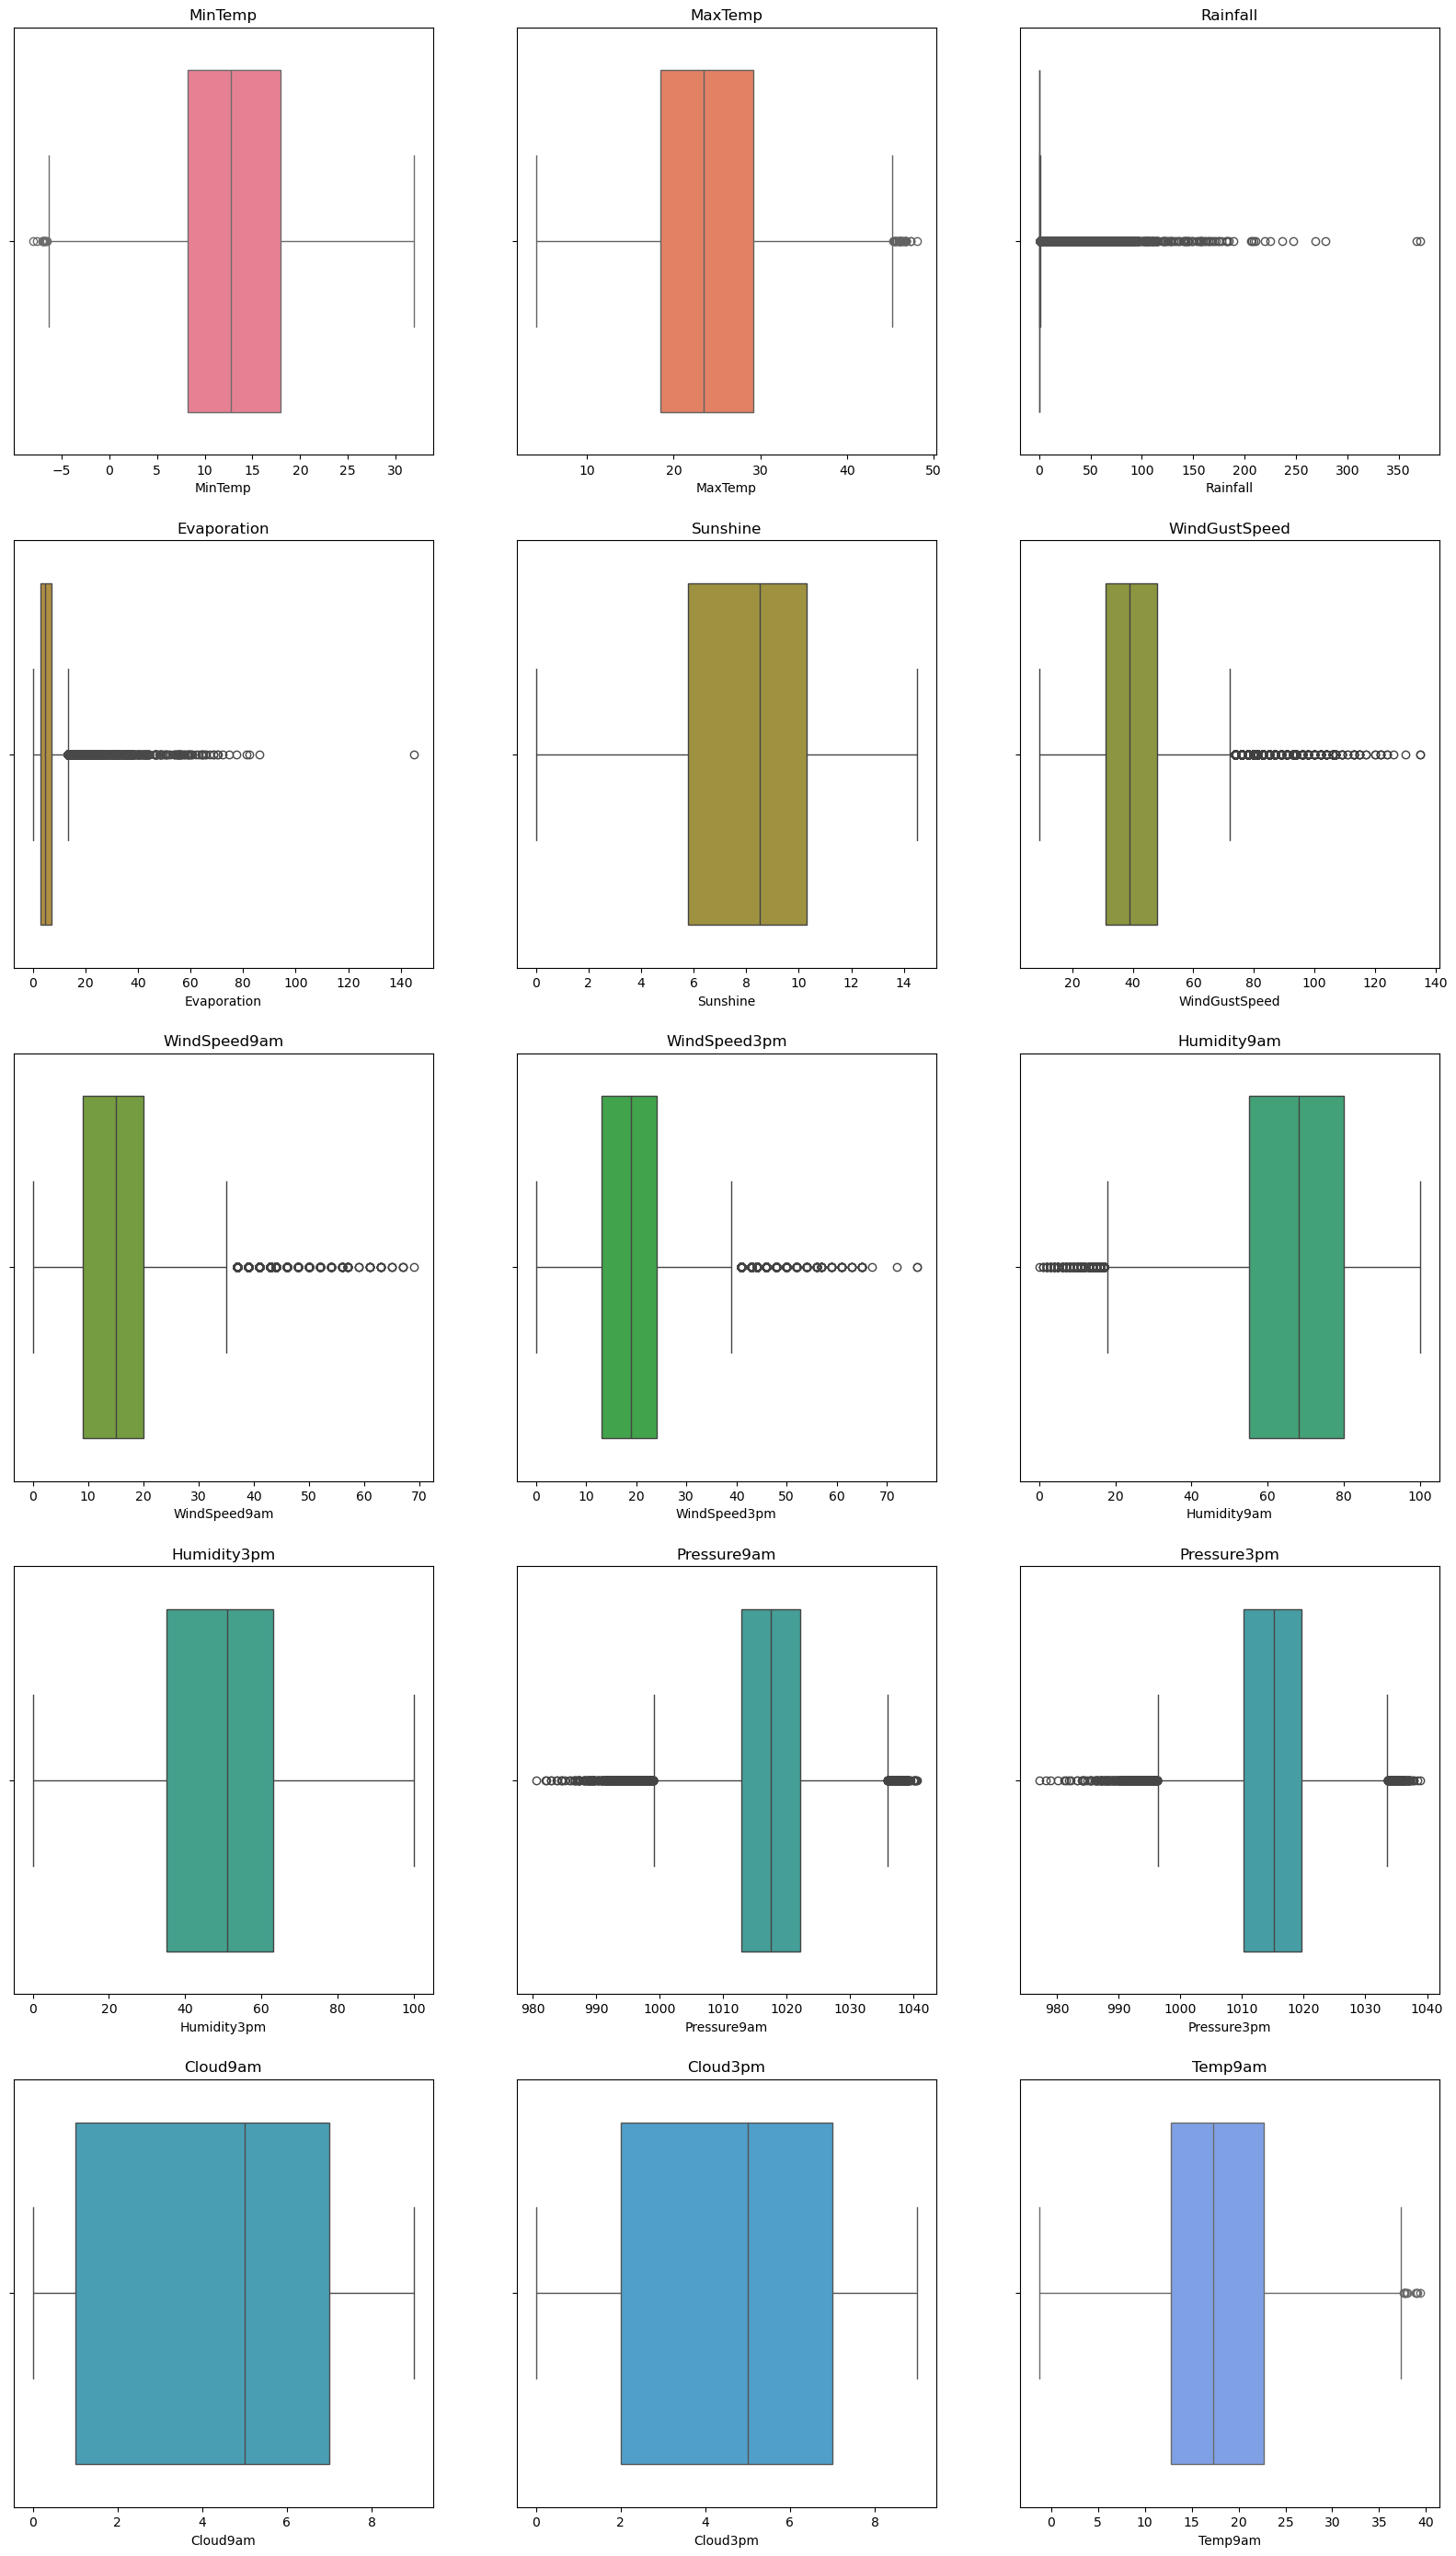

In [337]:
colors = sns.color_palette('husl', len(num_col))
fig,ax=plt.subplots(5,3,figsize=(20,35))
idx=0
for i in range(5):
    for j in range(3):
        sns.boxplot(ax=ax[i, j], x=data[num_col[idx]],color=colors[idx])
        ax[i, j].set_title(num_col[idx])
        idx=idx+1

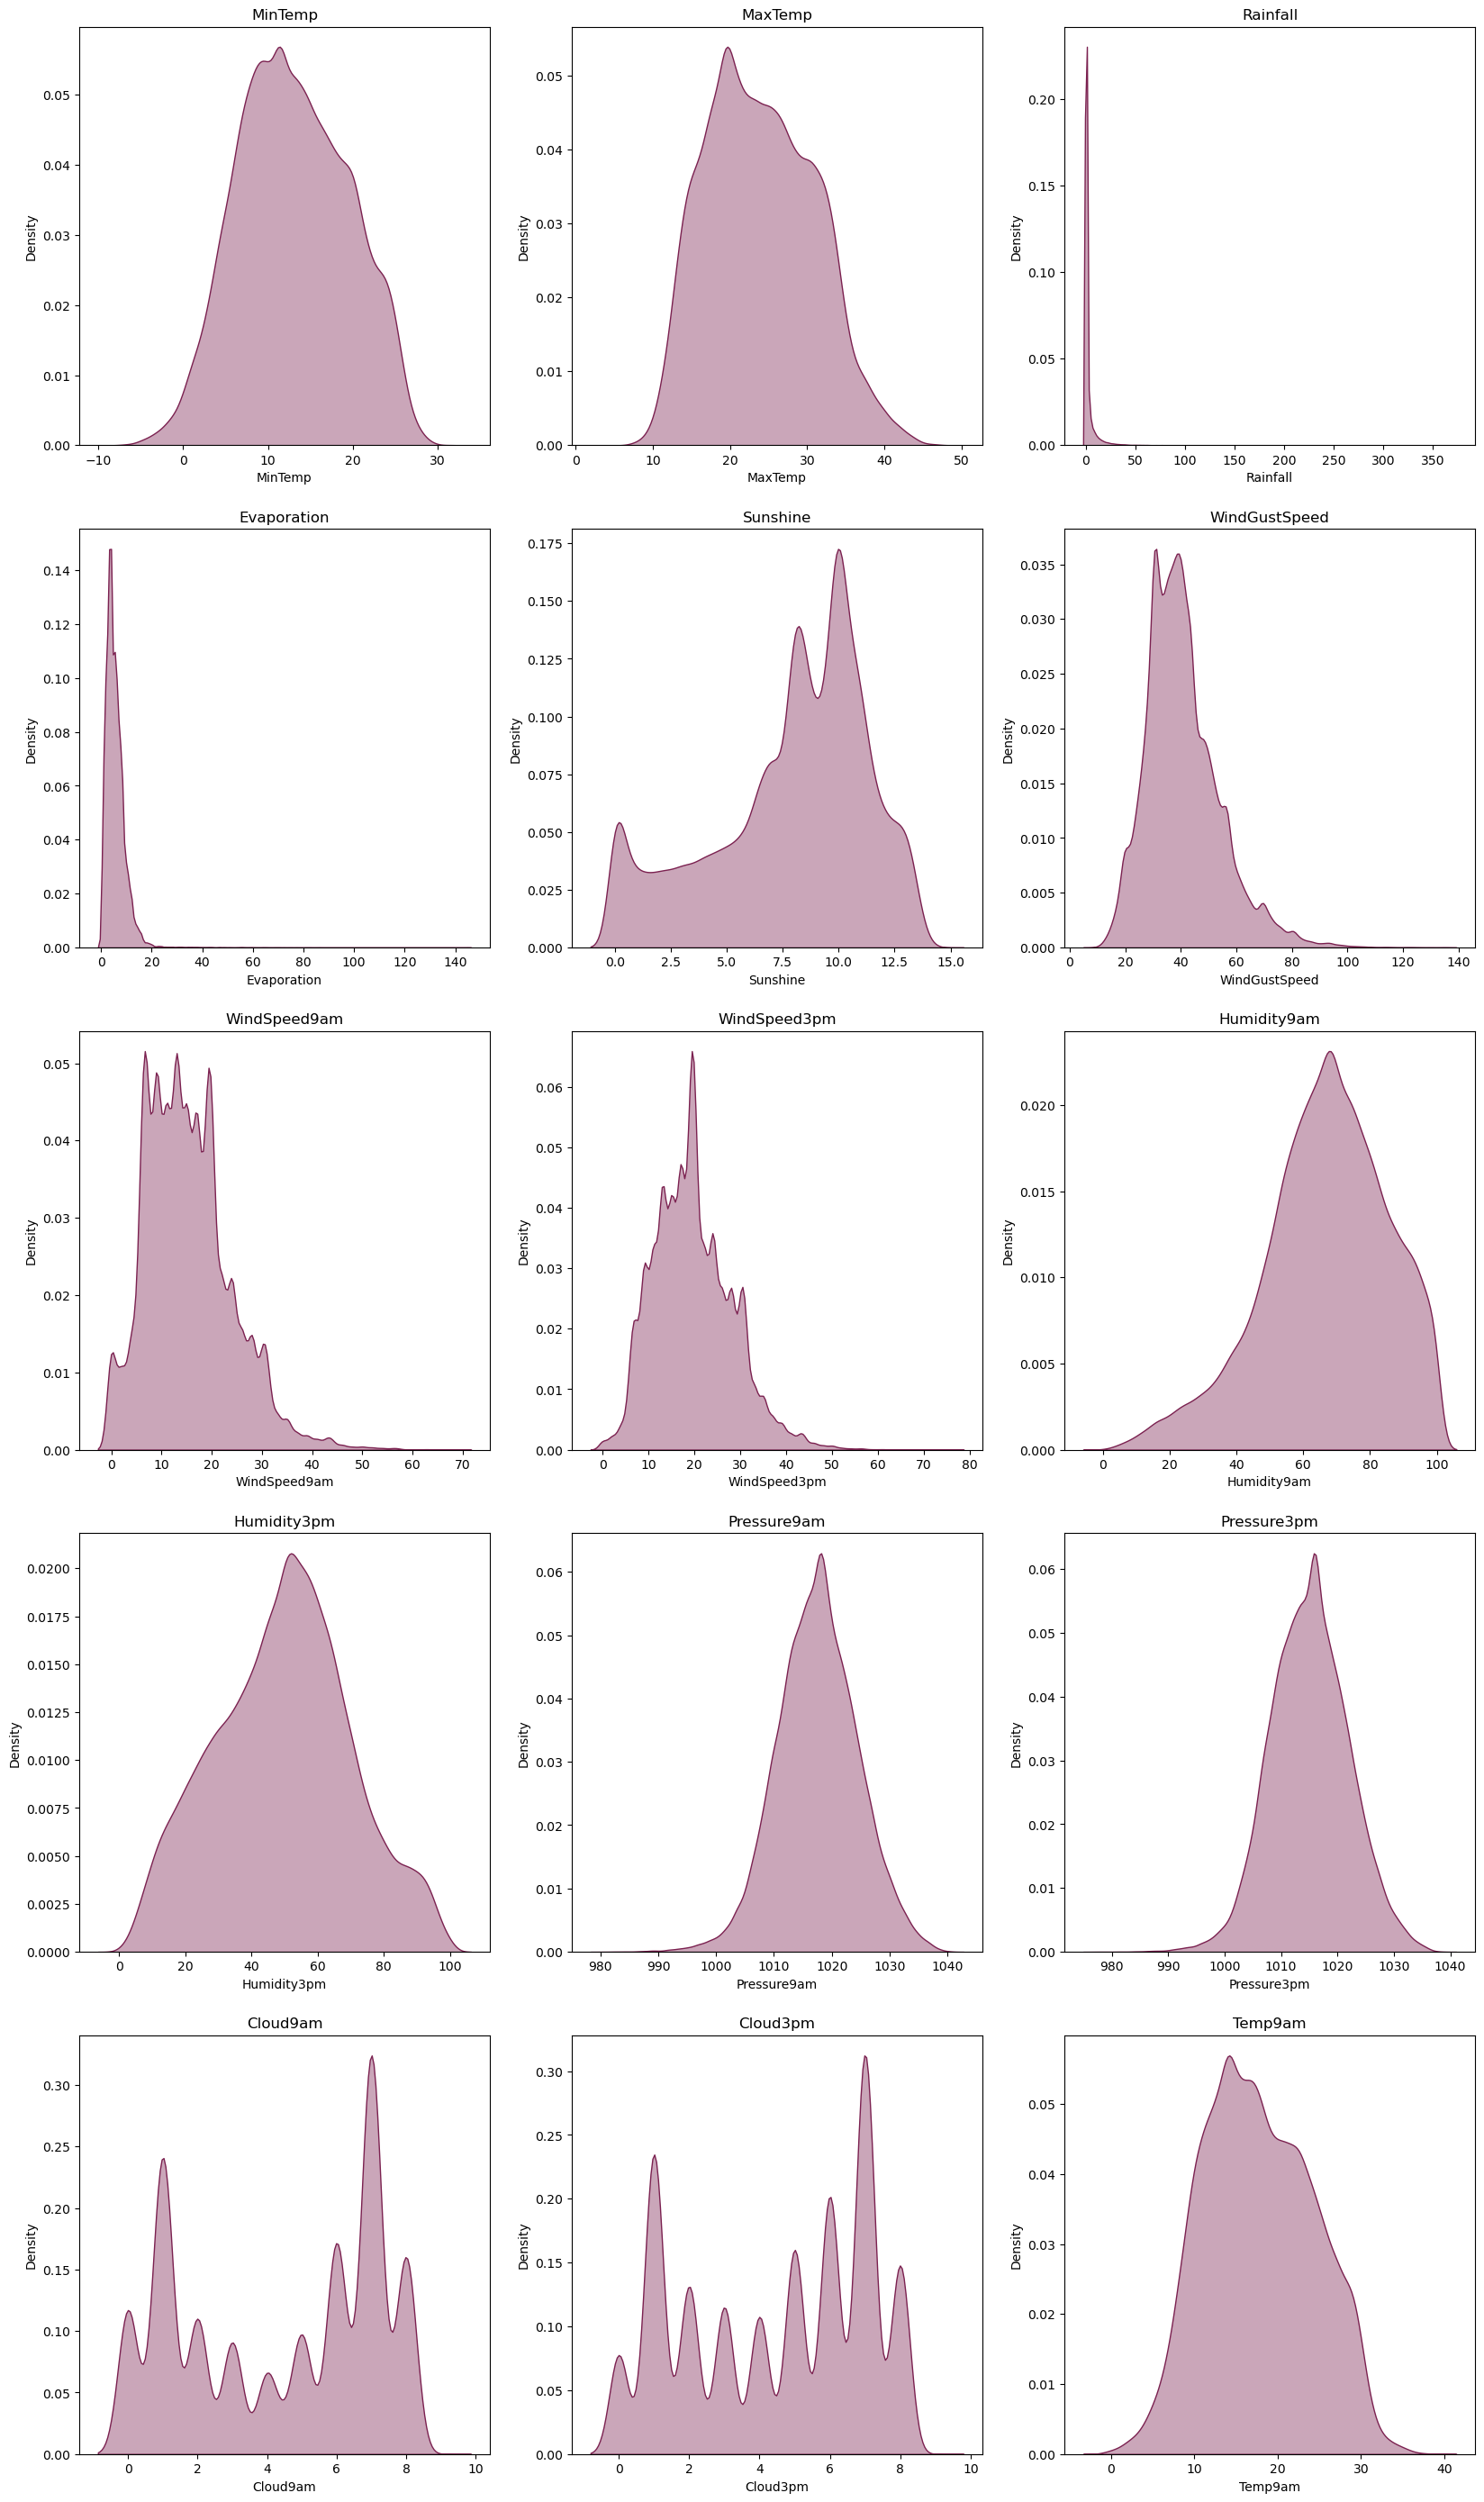

In [338]:
def handle_outlires_IQR(data):
    num_col = data.select_dtypes(exclude='object').columns
    for col in num_col:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        TQR=1.5*IQR
        outliers = data[ ( data[col] < (Q1 -IQR)) | (data[col] > (Q3 +IQR) ) ][col]
        med_value=data[col].median()
        data[data[col].isin([outliers])][col]=med_value
    return data

data=handle_outlires_IQR(data)

fig,ax=plt.subplots(5,3,figsize=(20,35))
idx=0
for i in range(5):
    for j in range(3):
        sns.kdeplot(ax=ax[i, j], x=data[num_col[idx]],color=c,alpha=0.4,fill=True)
        ax[i, j].set_title(num_col[idx])
        idx=idx+1
    



Pipeline

In [339]:
num_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
]
        
)
num_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [340]:
cat_pipeline=Pipeline( steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])
cat_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())])

In [341]:
features=data.drop('RainTomorrow',axis=1)
labels=data['RainTomorrow']

num_col = features.select_dtypes(exclude='object').columns
cat_col = features.select_dtypes(include='object').columns

x_train,x_test,y_train,y_test =train_test_split(features,labels,test_size=0.30,random_state=42)

In [342]:
col_transformer=ColumnTransformer(
    transformers=[('num_pipeline',num_pipeline,num_col)
                ,('cat_pipeline',cat_pipeline,cat_col)
                ]
    , remainder='passthrough',n_jobs=-1

)
col_transformer

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])

In [343]:
rf = RandomForestClassifier(random_state=42)

pipefinal=make_pipeline(col_transformer,rf)
pipefinal

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressur...ud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

Modelling dan evaluasi 

In [344]:
print("Ukuran x_test:", x_test.shape)
print("Ukuran y_test:", y_test.shape)

if x_test.shape[0] != y_test.shape[0]:
    min_length = min(x_test.shape[0], y_test.shape[0])
    x_test = x_test[:min_length]
    y_test = y_test[:min_length]


Ukuran x_test: (24012, 24)
Ukuran y_test: (24012,)


In [345]:
pipefinal.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressur...ud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [346]:
pred=pipefinal.predict(x_test)

print('Accuracy Score :', accuracy_score(y_test, pred) , '\n')
print('Classification Report :', '\n',classification_report(y_test, pred))

Accuracy Score : 0.8624437781109445 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     18909
         1.0       0.77      0.51      0.61      5103

    accuracy                           0.86     24012
   macro avg       0.82      0.73      0.76     24012
weighted avg       0.85      0.86      0.85     24012



In [347]:
y_pred=cross_val_predict(pipefinal,x_train,y_train,cv=3)
cm=confusion_matrix(y_train,y_pred)
cm

array([[42116,  1890],
       [ 5987,  6035]])

Ukuran x_test: (24012, 24)
Ukuran y_test: (24012,)


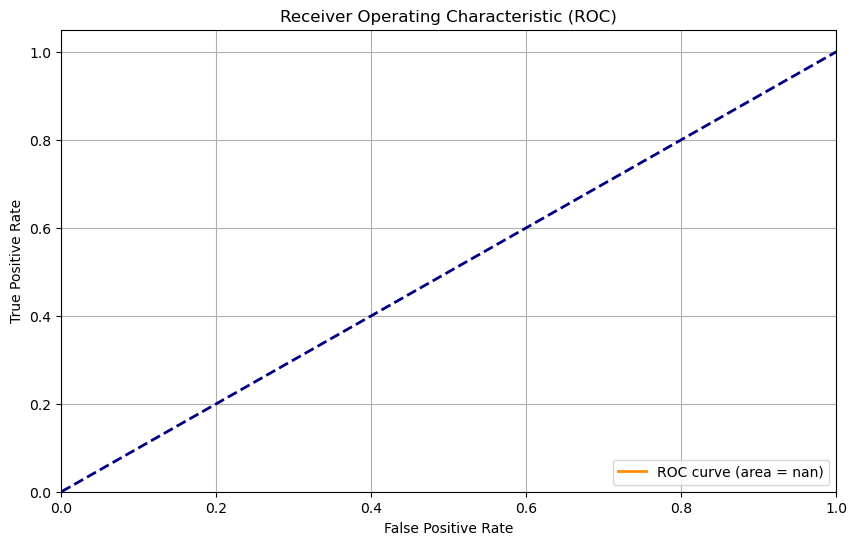

In [348]:
# Periksa ukuran data uji
print("Ukuran x_test:", x_test.shape)
print("Ukuran y_test:", y_test.shape)

# Jika ada ketidakcocokan, ambil subset data yang cocok
if x_test.shape[0] != y_test.shape[0]:
    min_length = min(x_test.shape[0], y_test.shape[0])
    x_test = x_test[:min_length]
    y_test = y_test[:min_length]

# Setelah memastikan ukuran cocok, lanjutkan dengan prediksi probabilitas
y_prob = pipefinal.predict_proba(x_test)[:, 1]

# Menghitung FPR, TPR, dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)

# Membuat grafik ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Cloud Classification, Temperature Classification, Fog Classification

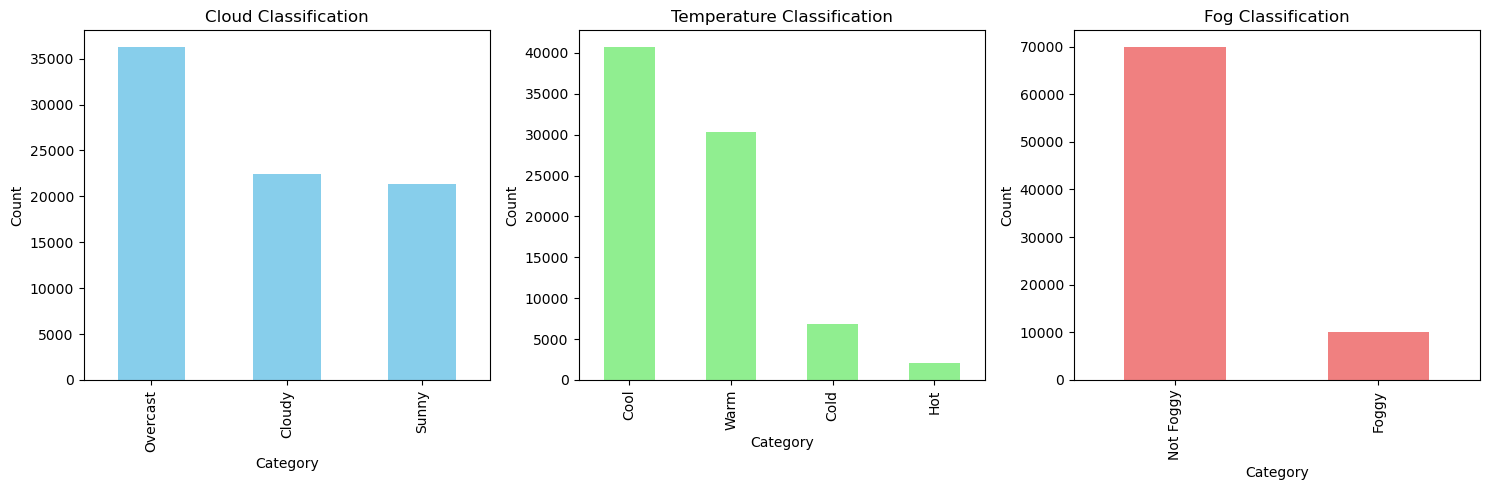

In [349]:
def classify_cloud(row):
    if row['Cloud9am'] >= 7 or row['Cloud3pm'] >= 7:
        return 'Overcast'
    elif row['Cloud9am'] >= 4 or row['Cloud3pm'] >= 4:
        return 'Cloudy'
    else:
        return 'Sunny'

def classify_temperature(row):
    avg_temp = (row['MinTemp'] + row['MaxTemp']) / 2
    if avg_temp >= 30:
        return 'Hot'
    elif avg_temp >= 20:
        return 'Warm'
    elif avg_temp >= 10:
        return 'Cool'
    else:
        return 'Cold'

def classify_fog(row):
    if row['Humidity9am'] >= 90 or row['Humidity3pm'] >= 90:
        return 'Foggy'
    else:
        return 'Not Foggy'

# Apply classification functions
data['CloudClassification'] = data.apply(classify_cloud, axis=1)
data['TempClassification'] = data.apply(classify_temperature, axis=1)
data['FogClassification'] = data.apply(classify_fog, axis=1)

# Plotting the classifications
plt.figure(figsize=(15, 5))

# Cloud Classification plot
plt.subplot(1, 3, 1)
cloud_counts = data['CloudClassification'].value_counts()
cloud_counts.plot(kind='bar', color='skyblue')
plt.title('Cloud Classification')
plt.xlabel('Category')
plt.ylabel('Count')

# Temperature Classification plot
plt.subplot(1, 3, 2)
temp_counts = data['TempClassification'].value_counts()
temp_counts.plot(kind='bar', color='lightgreen')
plt.title('Temperature Classification')
plt.xlabel('Category')
plt.ylabel('Count')

# Fog Classification plot
plt.subplot(1, 3, 3)
fog_counts = data['FogClassification'].value_counts()
fog_counts.plot(kind='bar', color='lightcoral')
plt.title('Fog Classification')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [350]:
features = ['Cloud9am', 'Cloud3pm', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']

X = data[features]
y_cloud = data['CloudClassification']

X_train, X_test, y_train, y_test = train_test_split(X, y_cloud, test_size=0.2, random_state=42)

rf_cloud = RandomForestClassifier(random_state=42)
rf_cloud.fit(X_train, y_train)

# Predict cloud
y_pred_cloud = rf_cloud.predict(X_test)

# Evaluate cloud
print("Cloud Classification Evaluation:")
cloud_cm = confusion_matrix(y_test, y_pred_cloud)
print("Confusion Matrix:\n", cloud_cm)
print("Accuracy:", accuracy_score(y_test, y_pred_cloud))
print("Precision:", precision_score(y_test, y_pred_cloud, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_cloud, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_cloud, average='weighted'))

y_temp = data['TempClassification']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_temp, test_size=0.2, random_state=42)

# Train model
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)

# Predict
y_pred_temp = rf_temp.predict(X_test)

# Evaluate
print("\nTemperature Classification Evaluation:")
temp_cm = confusion_matrix(y_test, y_pred_temp)
print("Confusion Matrix:\n", temp_cm)
print("Accuracy:", accuracy_score(y_test, y_pred_temp))
print("Precision:", precision_score(y_test, y_pred_temp, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_temp, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_temp, average='weighted'))

# Fog Classification
y_fog = data['FogClassification']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_fog, test_size=0.2, random_state=42)

# Train model
rf_fog = RandomForestClassifier(random_state=42)
rf_fog.fit(X_train, y_train)

# Predict
y_pred_fog = rf_fog.predict(X_test)

# Evaluate
print("\nFog Classification Evaluation:")
fog_cm = confusion_matrix(y_test, y_pred_fog)
print("Confusion Matrix:\n", fog_cm)
print("Accuracy:", accuracy_score(y_test, y_pred_fog))
print("Precision:", precision_score(y_test, y_pred_fog, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_fog, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_fog, average='weighted'))

Cloud Classification Evaluation:
Confusion Matrix:
 [[4490    0    0]
 [   0 7303    0]
 [   0    0 4215]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Temperature Classification Evaluation:
Confusion Matrix:
 [[1413   17    0    0]
 [  14 8051    0   15]
 [   0    0  372   13]
 [   0   16    2 6095]]
Accuracy: 0.9951899050474763
Precision: 0.9951882684821901
Recall: 0.9951899050474763
F1 Score: 0.9951837516800968

Fog Classification Evaluation:
Confusion Matrix:
 [[ 2010     0]
 [    0 13998]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


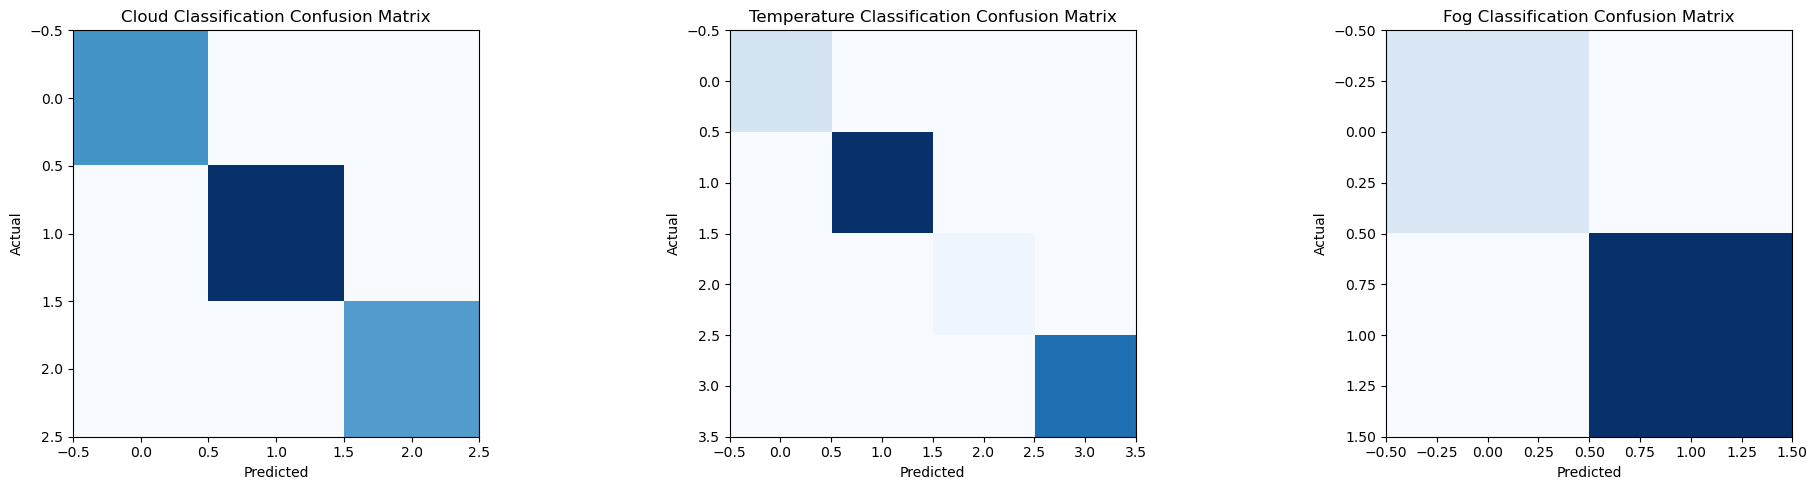

In [351]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(cloud_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Cloud Classification Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

axes[1].imshow(temp_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Temperature Classification Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

axes[2].imshow(fog_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[2].set_title('Fog Classification Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Testing

In [352]:
# Data uji
test_data = {
    'Location': ['Melbourne'],
    'MinTemp': [12.5],
    'MaxTemp': [26.8],
    'Rainfall': [2.3],
    'Evaporation': [4.2],
    'Sunshine': [8.5],
    'WindGustDir': ['SE'],
    'WindGustSpeed': [40.5],
    'WindDir9am': ['E'],
    'WindDir3pm': ['SSE'],
    'WindSpeed9am': [18.5],
    'WindSpeed3pm': [22.0],
    'Humidity9am': [75.0],
    'Humidity3pm': [60.5],
    'Pressure9am': [1015.5],
    'Pressure3pm': [1010.2],
    'Cloud9am': [2.0],
    'Cloud3pm': [4.0],
    'Temp9am': [17.5],
    'Temp3pm': [25.2],
    'RainToday': ['Yes'],
    'Day': [22],
    'Month': [9],
    'Year': [2024]
}

# Membuat DataFrame dari data inputan
test_data = pd.DataFrame(test_data)

# Fungsi klasifikasi cloud
def classify_cloud(row):
    return 'Overcast' if row['Cloud9am'] >= 7 or row['Cloud3pm'] >= 7 else 'Cloudy' if row['Cloud9am'] >= 4 or row['Cloud3pm'] >= 4 else 'Sunny'

# Fungsi klasifikasi suhu
def classify_temperature(row):
    avg_temp = (row['MinTemp'] + row['MaxTemp']) / 2
    return 'Hot' if avg_temp >= 30 else 'Warm' if avg_temp >= 20 else 'Cool' if avg_temp >= 10 else 'Cold'

# Fungsi klasifikasi kabut
def classify_fog(row):
    return 'Foggy' if row['Humidity9am'] >= 90 or row['Humidity3pm'] >= 90 else 'Not Foggy'

# Menambahkan kolom klasifikasi
test_data['CloudClassification'] = test_data.apply(classify_cloud, axis=1)
test_data['TempClassification'] = test_data.apply(classify_temperature, axis=1)
test_data['FogClassification'] = test_data.apply(classify_fog, axis=1)

# Menampilkan data inputan dengan klasifikasi
print(test_data)

# Menggunakan model Random Forest yang telah dilatih sebelumnya
# Misalnya model yang telah dilatih adalah rf_cloud, rf_temp, dan rf_fog
features = ['Cloud9am', 'Cloud3pm', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']

# Prediksi Cloud Classification
cloud_prediction = rf_cloud.predict(test_data[features])
print('Cloud Classification Prediction: ', cloud_prediction)

# Prediksi Temperature Classification
temp_prediction = rf_temp.predict(test_data[features])
print('Temperature Classification Prediction: ', temp_prediction)

# Prediksi Fog Classification
fog_prediction = rf_fog.predict(test_data[features])
print('Fog Classification Prediction: ', fog_prediction)

    Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  Melbourne     12.5     26.8       2.3          4.2       8.5          SE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           40.5          E        SSE          18.5          22.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         75.0         60.5       1015.5       1010.2       2.0       4.0   

   Temp9am  Temp3pm RainToday  Day  Month  Year CloudClassification  \
0     17.5     25.2       Yes   22      9  2024              Cloudy   

  TempClassification FogClassification  
0               Cool         Not Foggy  
Cloud Classification Prediction:  ['Cloudy']
Temperature Classification Prediction:  ['Cool']
Fog Classification Prediction:  ['Not Foggy']


In [353]:
test_data = {
    'Location': ['Sydney'],
    'MinTemp': [18.5],
    'MaxTemp': [23.0],
    'Rainfall': [8.5],
    'Evaporation': [2.0],
    'Sunshine': [3.5],
    'WindGustDir': ['SE'],
    'WindGustSpeed': [45.0],
    'WindDir9am': ['E'],
    'WindDir3pm': ['SE'],
    'WindSpeed9am': [25.0],
    'WindSpeed3pm': [30.0],
    'Humidity9am': [90.0],
    'Humidity3pm': [85.0],
    'Pressure9am': [1005.0],
    'Pressure3pm': [1002.0],
    'Cloud9am': [7.0],
    'Cloud3pm': [8.0],
    'Temp9am': [19.5],
    'Temp3pm': [21.0],
    'RainToday': ['Yes'],
    'Day': [10],
    'Month': [3],
    'year': [2024]
}

# Membuat DataFrame dari data inputan
test_data = pd.DataFrame(test_data)

# Menampilkan data inputan
print(test_data)
# Buat prediksi menggunakan pipeline yang telah dilatih
predictions = pipefinal.predict(test_data)

# Menampilkan hasil prediksi
print('Prediksi: ', predictions)

  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Sydney     18.5     23.0       8.5          2.0       3.5          SE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           45.0          E         SE          25.0          30.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         90.0         85.0       1005.0       1002.0       7.0       8.0   

   Temp9am  Temp3pm RainToday  Day  Month  year  
0     19.5     21.0       Yes   10      3  2024  
Prediksi:  [1.]


In [354]:
test_data = {
    'Location': ['Melbourne'],
    'MinTemp': [12.5],
    'MaxTemp': [26.8],
    'Rainfall': [2.3],
    'Evaporation': [4.2],
    'Sunshine': [8.5],
    'WindGustDir': ['SE'],
    'WindGustSpeed': [40.5],
    'WindDir9am': ['E'],
    'WindDir3pm': ['SSE'],
    'WindSpeed9am': [18.5],
    'WindSpeed3pm': [22.0],
    'Humidity9am': [75.0],
    'Humidity3pm': [60.5],
    'Pressure9am': [1015.5],
    'Pressure3pm': [1010.2],
    'Cloud9am': [2.0],
    'Cloud3pm': [4.0],
    'Temp9am': [17.5],
    'Temp3pm': [25.2],
    'RainToday': ['Yes'],
    'Day': [22],
    'Month': [9],
    'year': [2024]
}

# Membuat DataFrame dari data inputan
test_data = pd.DataFrame(test_data)

# Menampilkan data inputan
print(test_data)
# Buat prediksi menggunakan pipeline yang telah dilatih
predictions = pipefinal.predict(test_data)

# Menampilkan hasil prediksi
print('Prediksi: ', predictions)

    Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  Melbourne     12.5     26.8       2.3          4.2       8.5          SE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           40.5          E        SSE          18.5          22.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         75.0         60.5       1015.5       1010.2       2.0       4.0   

   Temp9am  Temp3pm RainToday  Day  Month  year  
0     17.5     25.2       Yes   22      9  2024  
Prediksi:  [0.]


In [355]:
# Contoh data inputan
test_data = {
    'Location': ['Melbourne', 'Sydney'],
    'MinTemp': [12.5, 18.5],
    'MaxTemp': [12.5, 23.0],
    'Rainfall': [2.3, 8.5],
    'Evaporation': [4.2, 2.0],
    'Sunshine': [8.5, 3.5],
    'WindGustDir': ['SE', 'SE'],
    'WindGustSpeed': [40.5, 45.0],
    'WindDir9am': ['E', 'E'],
    'WindDir3pm': ['SSE', 'SE'],
    'WindSpeed9am': [18.5, 25.0],
    'WindSpeed3pm': [22.0, 30.0],
    'Humidity9am': [75.0, 90.0],
    'Humidity3pm': [60.5, 85.0],
    'Pressure9am': [1015.5, 1005.5],
    'Pressure3pm': [1010.2, 1002.2],
    'Cloud9am': [2.0, 7.0],
    'Cloud3pm': [4.0, 8.0],
    'Temp9am': [17.5, 19.5],
    'Temp3pm': [25.2, 21.0],
    'RainToday': ['Yes', 'Yes'],
    'Day': [22, 10],
    'Month': [9, 3],
    'year': [2024, 2024]
}

# Membuat DataFrame dari data inputan
test_data = pd.DataFrame(test_data)

# Menampilkan data inputan
print(test_data)
# Buat prediksi menggunakan pipeline yang telah dilatih
predictions = pipefinal.predict(test_data)

# Menampilkan hasil prediksi
print('Prediksi: ', predictions)

    Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  Melbourne     12.5     12.5       2.3          4.2       8.5          SE   
1     Sydney     18.5     23.0       8.5          2.0       3.5          SE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           40.5          E        SSE          18.5          22.0   
1           45.0          E         SE          25.0          30.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         75.0         60.5       1015.5       1010.2       2.0       4.0   
1         90.0         85.0       1005.5       1002.2       7.0       8.0   

   Temp9am  Temp3pm RainToday  Day  Month  year  
0     17.5     25.2       Yes   22      9  2024  
1     19.5     21.0       Yes   10      3  2024  
Prediksi:  [0. 1.]
